### Importing and Cleaning Data

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

ORIGINAL_DATASET = "../WineQT.xlsx"

ORIGINAL_DATA_COLUMNS = { "fixed acidity": float,	"volatile acidity": float,	"citric acid": float,	"residual sugar": float,
                    "chlorides": float,	"free sulfur dioxide": float,	"total sulfur dioxide": float,	"density": float,	"pH": float,
                    "sulphates": float,	"alcohol": float,	"quality": float, "Id": float}

df = pd.read_excel(ORIGINAL_DATASET, dtype=ORIGINAL_DATA_COLUMNS)

X = np.array(df.iloc[:, 0:11].values)
y = np.array(df.iloc[:, 11].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))

### Building CNN

In [75]:
import tensorflow as tf

from tensorflow.python.keras import layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(11, 1, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 11, 1, 32)         64        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 11, 1, 32)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 1, 64)         2112      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 11, 1, 64)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 11, 1, 64)         4160      
_________________________________________________________________
flatten_16 (Flatten)         (None, 704)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)              

### Compiling and Training CNN

In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/25
24/24 [==============================] - 1s 9ms/step - loss: 1.5889 - accuracy: 0.3856 - val_loss: 1.2033 - val_accuracy: 0.4656
Epoch 2/25
24/24 [==============================] - 0s 4ms/step - loss: 1.2382 - accuracy: 0.4458 - val_loss: 1.1248 - val_accuracy: 0.5582
Epoch 3/25
24/24 [==============================] - 0s 4ms/step - loss: 1.2024 - accuracy: 0.4562 - val_loss: 1.1048 - val_accuracy: 0.5661
Epoch 4/25
24/24 [==============================] - 0s 3ms/step - loss: 1.1827 - accuracy: 0.4680 - val_loss: 1.0865 - val_accuracy: 0.5714
Epoch 5/25
24/24 [==============================] - 0s 3ms/step - loss: 1.1711 - accuracy: 0.4719 - val_loss: 1.1225 - val_accuracy: 0.4497
Epoch 6/25
24/24 [==============================] - 0s 3ms/step - loss: 1.1596 - accuracy: 0.4863 - val_loss: 1.0913 - val_accuracy: 0.5132
Epoch 7/25
24/24 [==============================] - 0s 3ms/step - loss: 1.1417 - accuracy: 0.5072 - val_loss: 1.0288 - val_accuracy: 0.6164
Epoch 8/25
24/24 [==

### Plotting Accuracy

12/12 - 0s - loss: 0.9870 - accuracy: 0.5529


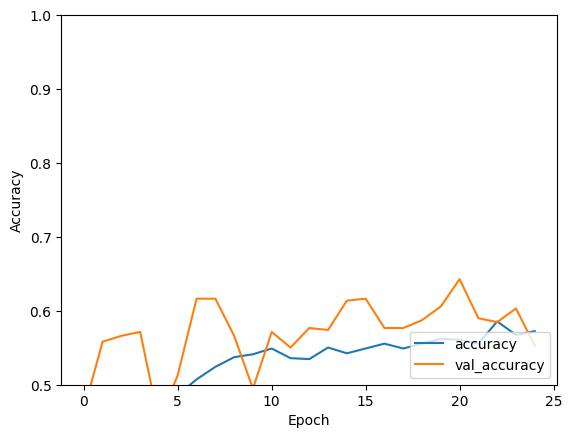

In [77]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

### Printing Final Test Accuracy

In [78]:
print(test_acc)

0.5529100298881531


### Saving Model

In [79]:
model.save('cnn.h5')

### Loading Model

In [80]:
loaded_model = models.Sequential()
loaded_model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(11, 1, 1)))
loaded_model.add(layers.MaxPooling2D((1, 1)))
loaded_model.add(layers.Conv2D(64, (1, 1), activation='relu'))
loaded_model.add(layers.MaxPooling2D((1, 1)))
loaded_model.add(layers.Conv2D(64, (1, 1), activation='relu'))
loaded_model.add(layers.Flatten())
loaded_model.add(layers.Dense(64, activation='relu'))
loaded_model.add(layers.Dense(10))
loaded_model.summary()
loaded_model.load_weights('cnn.h5')

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 11, 1, 32)         64        
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 11, 1, 32)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 1, 64)         2112      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 1, 64)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 1, 64)         4160      
_________________________________________________________________
flatten_17 (Flatten)         (None, 704)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)              

### Printing Final Test Accuracy of Loaded Model

In [81]:
loaded_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:
test_loss, test_acc = loaded_model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

12/12 - 0s - loss: 0.9870 - accuracy: 0.5529
0.5529100298881531
